In [118]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
import sklearn


# Import of the right libraries

In [166]:

data = pd.read_csv('data/listings.csv')
musea = pd.read_csv('ExternalData/locaties-musea-gent.csv', delimiter=';')
busses = pd.read_csv('ExternalData/bushaltes-gent.csv', delimiter=';')
cafes = pd.read_csv('ExternalData/cafes-gent.csv', delimiter=';')
restos = pd.read_csv('ExternalData/koop-lokaal-horeca.csv', delimiter=';')
winkels = pd.read_csv('ExternalData/koop-lokaal-winkels.csv', delimiter=';')
bomen = pd.read_csv('ExternalData/locaties-bomen-gent.csv', delimiter=';')
parkings = pd.read_csv('ExternalData/locaties-openbare-parkings-gent.csv', delimiter=';')


In [167]:
parkings.head(5)

,Geometry,parking,naam,url,type,parkingregime,straatnaam,huisnr,eigenaar,capaciteit,urid,dashboard,geo_point_2d
0,"{""coordinates"": [3.723184835346397, 51.0488857...",P4,Savaanstraat,https://stad.gent/node/36391,Parking,NaN,Savaanstraat,13,NaN,588.0,mob/parking1066,False,"51.0488857177,3.72318483535"
1,"{""coordinates"": [3.725948412486469, 51.0420987...",P10,Sint-Pietersplein,https://stad.gent/node/36394,Parking,NaN,Sint-Pietersplein,65,NaN,708.0,mob/parking1070,False,"51.0420987198,3.72594841249"
2,"{""coordinates"": [3.756416392314891, 51.0350957...",P+R,Gentbrugge,https://stad.gent/node/34591,Park and Ride,Tijdelijk buiten gebruik,Land van Rodelaan,NaN,NaN,0.0,mob/parking1072,False,"51.0350957269,3.75641639231"
3,"{""coordinates"": [3.678370760430587, 51.0762393...",P+R,Mariakerke Post,https://stad.gent/node/34598,Park and Ride,NaN,Brugsesteenweg,NaN,NaN,25.0,mob/parking1075,False,"51.07623931,3.67837076043"
4,"{""coordinates"": [3.704960084356771, 51.0870903...",P+R,Neptunus,https://stad.gent/node/36642/,Park and Ride,NaN,NaN,NaN,NaN,148.0,mob/parking1084,False,"51.0870903518,3.70496008436"


Lucas Derveaux, Tibo Vandercruyssen and Bavo Persyn


# Division of labor ##

We did this entire project together with pair programming.
We got together and devided smaller task and combined our findings in bigger cells regularly.
The table below shows the division of labor, but as said before, we rarely worked alone and helped each other out even when it wasn't our particular subject.

| Work                                                  | Lucas Derveaux | Bavo Persyn | Tibo Vandercruyssen |
|-------------------------------------------------------|:--------------:|:-----------:|:-------------------:|
| Preprocessing                                         | X              | X           | X                   |
| Visualising data (scatterplots and correlationmatrix) | X              | X           | X                   |
| Eliminating Outliers                                  | X              |             | X                   |
| Investigating Description/Amenities                   | X              |             | X                   |
| Lineair Regression                                    | X              |             | X                   |
| Decision Trees                                        |                | X           |                     |
| K-nearest Neighbours                                  |                | X           |                     |

# Data preprocessing

In [121]:
data
# First visual look of the given data

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,...,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,Unnamed: 74
0,187870,https://www.airbnb.com/rooms/187870,20210716195504,2021-07-16,Luxury studio 'Spiegelhof' in the centre of Ghent,The top floor of our house in the center of Gh...,We live in a quiet and pleasant neighborhood w...,https://a0.muscache.com/pictures/26c46224-795c...,904277,https://www.airbnb.com/users/show/904277,...,4.58,4.85,NaN,t,1,0,1,0,3.61,NaN
1,203806,https://www.airbnb.com/rooms/203806,20210716195504,2021-07-16,Flat close to Sint-Pieters Station!,This well-located and comfortable one-bedroom ...,The house is located in a dead-end street - so...,https://a0.muscache.com/pictures/fe477b7f-93ac...,999847,https://www.airbnb.com/users/show/999847,...,4.49,4.54,NaN,f,2,2,0,0,2.84,NaN
2,204245,https://www.airbnb.com/rooms/204245,20210716195504,2021-07-16,Modern studio's in Ghent centre,<b>The space</b><br />We offer luxury studio's...,NaN,https://a0.muscache.com/pictures/1766072/02965...,1003009,https://www.airbnb.com/users/show/1003009,...,4.97,4.63,NaN,f,2,2,0,0,0.29,NaN
3,216715,https://www.airbnb.com/rooms/216715,20210716195504,2021-07-16,converted loft,Please read full desription for how to get the...,It's close to all that you will want or need v...,https://a0.muscache.com/pictures/1927009/20760...,911466,https://www.airbnb.com/users/show/911466,...,4.89,4.76,NaN,t,1,1,0,0,4.31,NaN
4,252269,https://www.airbnb.com/rooms/252269,20210716195504,2021-07-16,Large & bright town House - Center Ghent - max 8p,"bright, spacious, authentic & beautifully rest...","our neighbourhood is quiet, but nicely vibrati...",https://a0.muscache.com/pictures/69675b54-3e78...,1195314,https://www.airbnb.com/users/show/1195314,...,4.98,4.72,NaN,f,1,1,0,0,2.23,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
918,51022259,https://www.airbnb.com/rooms/51022259,20210716195504,2021-07-16,Full apartment near Sint Pieters Station,This is a 2 bedroom apartment. Guests will en...,Apartment is located in neighborhood of Sint P...,the main station in Ghent. The street is very...,https://a0.muscache.com/pictures/47c0402d-8d28...,97573561,...,NaN,NaN,NaN,NaN,f,2,1,1,0.00,NaN
919,51036302,https://www.airbnb.com/rooms/51036302,20210716195504,2021-07-16,Guesthouse Flora,Geniet van de moderne en ouderwetse charme van...,De Flora is het meest noordelijke gedeelte van...,https://a0.muscache.com/pictures/186f59af-f089...,171955140,https://www.airbnb.com/users/show/171955140,...,NaN,NaN,NaN,f,1,1,0,0,NaN,NaN
920,51053223,https://www.airbnb.com/rooms/51053223,20210716195504,2021-07-16,Large modern house 10min from downtown Ghent/Gent,Just 10 minutes from historic downtown Ghent. ...,NaN,https://a0.muscache.com/pictures/7de8d4c4-0155...,2650664,https://www.airbnb.com/users/show/2650664,...,NaN,NaN,NaN,t,1,1,0,0,NaN,NaN
921,51056846,https://www.airbnb.com/rooms/51056846,20210716195504,2021-07-16,"Comfort, quiet en green in ancient part of center",NaN,NaN,https://a0.muscache.com/pictures/a7faff71-0c08...,45920980,https://www.airbnb.com/users/show/45920980,...,NaN,NaN,NaN,t,2,0,2,0,NaN,NaN


In [122]:
data_cleaned = data
# Some columns are shifted by an excessive comma. We shifted these columns by looking for errors in 'host_since'.
shifted = data_cleaned[data_cleaned['host_since'].str.match("20[0-2][0-9]-[0-1][0-9]-[0-3][0-9]")==False]
data_cleaned = data_cleaned[data_cleaned['host_since'].str.match("20[0-2][0-9]-[0-1][0-9]-[0-3][0-9]")==True]

for row in range(0, len(shifted)):
    shifted.iloc[row,6] = shifted.iloc[row,6] + ", " + shifted.iloc[row,7]
    for col in range( 7, (len(shifted.keys())-1) ):
        shifted.iloc[row,col] = shifted.iloc[row,col+1]
# The column Neighbourhood_overview contains a comma that got wrongfully parsed, the second part of neighbourhood_overview got wrongfully
# placed in the next column
# The for-loop above fixes this problem

data_cleaned = pd.concat([data_cleaned, shifted])

# We drop the last column as it is a useless column created by the excessive comma.
data_cleaned = data_cleaned.drop(columns=['Unnamed: 74'])

# Verification of datacleaning
data_cleaned

C:\Users\noot\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,187870,https://www.airbnb.com/rooms/187870,20210716195504,2021-07-16,Luxury studio 'Spiegelhof' in the centre of Ghent,The top floor of our house in the center of Gh...,We live in a quiet and pleasant neighborhood w...,https://a0.muscache.com/pictures/26c46224-795c...,904277,https://www.airbnb.com/users/show/904277,...,4.87,4.58,4.85,NaN,t,1,0,1,0,3.61
1,203806,https://www.airbnb.com/rooms/203806,20210716195504,2021-07-16,Flat close to Sint-Pieters Station!,This well-located and comfortable one-bedroom ...,The house is located in a dead-end street - so...,https://a0.muscache.com/pictures/fe477b7f-93ac...,999847,https://www.airbnb.com/users/show/999847,...,4.79,4.49,4.54,NaN,f,2,2,0,0,2.84
2,204245,https://www.airbnb.com/rooms/204245,20210716195504,2021-07-16,Modern studio's in Ghent centre,<b>The space</b><br />We offer luxury studio's...,NaN,https://a0.muscache.com/pictures/1766072/02965...,1003009,https://www.airbnb.com/users/show/1003009,...,4.70,4.97,4.63,NaN,f,2,2,0,0,0.29
3,216715,https://www.airbnb.com/rooms/216715,20210716195504,2021-07-16,converted loft,Please read full desription for how to get the...,It's close to all that you will want or need v...,https://a0.muscache.com/pictures/1927009/20760...,911466,https://www.airbnb.com/users/show/911466,...,4.85,4.89,4.76,NaN,t,1,1,0,0,4.31
4,252269,https://www.airbnb.com/rooms/252269,20210716195504,2021-07-16,Large & bright town House - Center Ghent - max 8p,"bright, spacious, authentic & beautifully rest...","our neighbourhood is quiet, but nicely vibrati...",https://a0.muscache.com/pictures/69675b54-3e78...,1195314,https://www.airbnb.com/users/show/1195314,...,4.97,4.98,4.72,NaN,f,1,1,0,0,2.23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515,35279903,https://www.airbnb.com/rooms/35279903,20210716195504,2021-07-16,"Box in a Box (Beam) - A rural gift, open it!",www.boxinabox.be ...,Village (Drongen) 2km <br />City by bike (Ghen...,https://a0.muscache.com/pictures/60412037-544b...,242219560,https://www.airbnb.com/users/show/242219560,...,5.00,4.60,4.80,NaN,t,2,2,0,0,0.51
516,35297611,https://www.airbnb.com/rooms/35297611,20210716195504,2021-07-16,"Box in a Box (Cube) - a rural gift, open it!",www.boxinabox.be ...,Village (Drongen) 2km <br />City by bike (Ghen...,https://a0.muscache.com/pictures/aeecf01e-7dfa...,242219560,https://www.airbnb.com/users/show/242219560,...,5.00,4.80,4.60,NaN,t,2,2,0,0,0.25
537,36503556,https://www.airbnb.com/rooms/36503556,20210716195504,2021-07-16,Visiting Gent! save money! many options to enjoy!,Small place with a big heart! <br />The goal o...,)<br /><br /><b>The space</b><br />The studio ...,https://a0.muscache.com/pictures/e006cafc-6a90...,274438998,https://www.airbnb.com/users/show/274438998,...,4.69,4.77,4.62,NaN,f,1,0,0,1,0.67
841,49136989,https://www.airbnb.com/rooms/49136989,20210716195504,2021-07-16,Boatie's * Bed bad boot,Aye!<br />Langs de oever van de Schelde stelle...,De woonboot ligt op de groene Scheldearm tusse...,https://a0.muscache.com/pictures/miso/Hosting-...,31377738,https://www.airbnb.com/users/show/31377738,...,5.00,5.00,5.00,NaN,t,1,0,1,0,0.48


In [123]:
# Because of the shift, the types of some values aren't right anymore

data_cleaned['longitude'] = data_cleaned['longitude'].astype(float)
data_cleaned['latitude'] = data_cleaned['latitude'].astype(float)


In [124]:
from math import radians, cos, sin, asin, sqrt

def haversine(lon1, lat1, lon2, lat2):
    """
    Calculate the great circle distance between two points 
    on the earth (specified in decimal degrees)
    """
    # convert decimal degrees to radians 
    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])
    # haversine formula 
    dlon = lon2 - lon1 
    dlat = lat2 - lat1 
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c = 2 * asin(sqrt(a)) 
    km = 6367 * c
    return km


In [125]:
# Changing the price to a numeric value instead of a string with a dollar-sign

data_cleaned['price']=data_cleaned['price'].str.replace(',','')
data_cleaned['price']=data_cleaned['price'].str.replace('$','')
data_cleaned["price"] = pd.to_numeric(data_cleaned["price"])

C:\Users\noot\AppData\Local\Temp/ipykernel_14116/4124887726.py:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  data_cleaned['price']=data_cleaned['price'].str.replace('$','')


We were going to use the review_scores but as there are quite a lot that haven't been filled in (NaN), we decided not to use them. As we thought either assigning a 0 or the average score would be skewing the data.

In [126]:
# Features investigated in our model

features = [
    'id',
    'longitude',
    'latitude',
    'amenities',
    'price',
]

In [127]:
# We drop all the columns that we won't use in this sprint
for col in data_cleaned.columns:
    if col not in features and col != 'price':
        data_cleaned = data_cleaned.drop([col], axis=1)

data_cleaned.columns

Index(['id', 'latitude', 'longitude', 'price'], dtype='object')

In [128]:
def distance_to_loc(place, row):
    distance = 0
    for i in range(place.shape[0]):
        distance += haversine(place.loc[i, 'x'], place.loc[i, 'y'], data_cleaned.loc[row, 'longitude'], data_cleaned.loc[row, 'latitude'])
    distance /= place.shape[0]
    return distance

In [129]:
for i in range(data_cleaned.shape[0]):
    data_cleaned.loc[i, 'avg_distance_to_musea'] = distance_to_loc(musea, i)

In [130]:
def places_in_neighbourhood(place, threshold, row):
    for i in range(place.shape[0]):
        if haversine(place.loc[i, 'longitude'], place.loc[i, 'latitude'], data_cleaned.loc[row, 'longitude'], data_cleaned.loc[row, 'latitude']) < threshold:
            return True
    return False

In [131]:
for i in range(data_cleaned.shape[0]):
    data_cleaned.loc[i, 'bus_within_100m'] = places_in_neighbourhood(busses, 0.1, i)
    data_cleaned.loc[i, 'bus_within_200m'] = places_in_neighbourhood(busses, 0.2, i)
    data_cleaned.loc[i, 'bus_within_500m'] = places_in_neighbourhood(busses, 0.5, i)
    data_cleaned.loc[i, 'bus_within_1000m'] = places_in_neighbourhood(busses, 1, i)   
    

In [132]:
def number_of_places_in_neighbourhood(place, threshold, row):
    aantal = 0
    for i in range(place.shape[0]):
        geo = place.loc[i, 'geo_point_2d']
        lat,long=geo.split(',')
        if haversine(float(long), float(lat), data_cleaned.loc[row, 'longitude'], data_cleaned.loc[row, 'latitude']) < threshold:
            aantal += 1
    return aantal

In [133]:
for i in range(data_cleaned.shape[0]):
    data_cleaned.loc[i, 'number_of_cafes_within_1500m'] = number_of_places_in_neighbourhood(cafes, 1.5, i)

In [134]:
from geopy.geocoders import Nominatim
geolocator = Nominatim(user_agent="MLProjectSprint3")


In [136]:
for i in range(restos.shape[0]):
    try:
        location = geolocator.geocode(restos.loc[i, 'Adres'] + ', ' + str(restos.loc[i, 'Postcode']) + ' ' + restos.loc[i, 'Gemeente'])
        if location is None:
            # zeker niet binnen anderhalve kilometer
            restos.loc[i, 'longitude'] = 0.0
            restos.loc[i, 'latitude'] = 0.0
        else: 
            restos.loc[i, 'longitude'] = location.longitude
            restos.loc[i, 'latitude'] = location.latitude
    except Exception as e:
        print(e)
        restos.loc[i, 'longitude'] = 0.0
        restos.loc[i, 'latitude'] = 0.0


HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /search?q=Sint-Niklaasstraat+34%2C+9000+Gent&format=json&limit=1 (Caused by ReadTimeoutError("HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Read timed out. (read timeout=1)"))
HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /search?q=Oudburg+20%2C+9000+Gent&format=json&limit=1 (Caused by ReadTimeoutError("HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Read timed out. (read timeout=1)"))
HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /search?q=Onderbergen+6%2C+9000+Gent&format=json&limit=1 (Caused by ReadTimeoutError("HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Read timed out. (read timeout=1)"))
HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /search?q=Kortrijksesteenweg+206%2C+

In [ ]:
# restos = restos.dropna(subset=['longitude', 'latitude'])

In [138]:
restos.head(15)
# restos[restos['longitude'] == 0.0]

,Naam,Aanbod,Keuken,Dieet,Take-away opties,Tekstveld,Adres,Postcode,Gemeente,Telefoonnummer,...,Image URL,E-mail,Column 15,Column 16,Column 17,Omschrijving voor paasactie,Link.1,image_path,longitude,latitude
0,8tea5 Ghent,Dranken;Zoet,Belgisch,NaN,NaN,"Bubble Tea, (Iced) Coffees en taartjes",Sint-Niklaasstraat 34,9000,Gent,0468113785,...,https://data.stad.gent/api/v2/catalog/datasets...,NaN,NaN,NaN,NaN,NaN,http://ghent.8tea5.shop,https://stad.gent/sites/default/files/koop_lok...,0.0,0.0
1,Aba-Jour,Brasserie keuken,Belgisch;Italiaans;Frans,NaN,NaN,"Gentse klassiekers zoals stoverij, ballen in t...",Oudburg 20,9000,Gent,0486562048,...,https://data.stad.gent/api/v2/catalog/datasets...,NaN,NaN,NaN,NaN,NaN,http://www.abajour-gent.com,https://stad.gent/sites/default/files/koop_lok...,0.0,0.0
2,Alice Gent,Ontbijt en brunch;Lunch;Zoet,Belgisch,NaN,NaN,"Ontbijtmanden,lunchboxes,quiches en patisserie",Onderbergen 6,9000,Gent,09 277 92 35,...,https://data.stad.gent/api/v2/catalog/datasets...,NaN,NaN,NaN,NaN,NaN,http://www.alice-gent.be,https://stad.gent/sites/default/files/koop_lok...,0.0,0.0
3,Alix - Table & Jardin d'Amis,Ontbijt en brunch;Lunch;Kindvriendelijk,Belgisch,NaN,NaN,"Afhaalmenu (voor-, hoofdgerecht en dessert) op...",Kortrijksesteenweg 206,9000,Gent,093289438,...,https://data.stad.gent/api/v2/catalog/datasets...,NaN,NaN,NaN,NaN,NaN,https://alixtablejardin.be/takeaway,https://stad.gent/sites/default/files/koop_lok...,0.0,0.0
4,Amfora,Brasserie keuken;Lunch;Zoet;Zomerwedstrijd,Belgisch,NaN,NaN,Huisgemaakte gerechten en drankjes. Van dagver...,Korte Kruisstraat 1,9000,Gent,0475286815,...,https://data.stad.gent/api/v2/catalog/datasets...,NaN,NaN,NaN,NaN,NaN,https://www.amfora-gent.com/,https://stad.gent/sites/default/files/media/im...,0.0,0.0
12,Bassin,Wereldkeuken,Belgisch;Mediterraans;Aziatisch;Marokkaans,NaN,NaN,"Wereldse combinaties die verrassen. Gezond, lo...","Bassijnstraat 65, 65",9050,Gentbrugge,0032494866614,...,https://data.stad.gent/api/v2/catalog/datasets...,NaN,NaN,NaN,NaN,NaN,https://www.facebook.com/Restaurant-Bassin-662...,https://stad.gent/sites/default/files/koop_lok...,0.0,0.0
14,Bavet - Verlorenkost,Pasta;Kindvriendelijk,Belgisch;Italiaans,Glutenvrij;Veganistisch;Vegetarisch,NaN,Fast casual spaghetti Made for Friends. 2nd be...,Verloren Kost 1,9000,Gent,NaN,...,https://data.stad.gent/api/v2/catalog/datasets...,NaN,NaN,NaN,NaN,NaN,https://www.bavet.eu/,https://stad.gent/sites/default/files/webform/...,0.0,0.0
16,Bøef,BBQ en grill,Amerikaans,Vegetarisch,NaN,Burgers & bites from around the world,Dok Noord 4b - Hal 16,9000,Gent,NaN,...,https://data.stad.gent/api/v2/catalog/datasets...,rok@dbc.gent,NaN,NaN,NaN,NaN,https://www.facebook.com/boefdoknoord,https://stad.gent/sites/default/files/webform/...,0.0,0.0
17,Bonavia,Brasserie keuken;Lunch;Pasta,Belgisch,NaN,NaN,Vers bereide comfortfood gerechten op restaura...,"Sint-pietersnieuwsstraat, 91",9000,Gent,0474510430,...,https://data.stad.gent/api/v2/catalog/datasets...,NaN,NaN,NaN,NaN,NaN,https://www.facebook.com/bonavia.Gent,https://stad.gent/sites/default/files/koop_lok...,0.0,0.0
23,Café Congé,Dranken;Brasserie keuken;Gezond;Pasta;Kindvrie...,Belgisch,NaN,NaN,Dit fijne café ligt middenin een levendige woo...,Fonteinplein 22,9000,Gent,NaN,...,https://data.stad.gent/api/v2/catalog/datasets...,charlottefrans@gmail.com,NaN,NaN,NaN,NaN,NaN,https://stad.gent/sites/default/files/webform/...,0.0,0.0


In [139]:
def number_of_places_in_neighbourhood_lonlat(place, threshold, row):
    aantal = 0
    for i in range(place.shape[0]):
        if haversine(place.loc[i, 'longitude'], place.loc[i, 'latitude'], data_cleaned.loc[row, 'longitude'], data_cleaned.loc[row, 'latitude']) < threshold:
            aantal += 1
    return aantal

In [140]:
for i in range(data_cleaned.shape[0]):
    data_cleaned.loc[i, 'number_of_restos_within_1500m'] = number_of_places_in_neighbourhood_lonlat(restos, 1.5, i)

In [150]:
for i in range(winkels.shape[0]):
    try:
        location = geolocator.geocode(winkels.loc[i, 'Adres'] + ', ' + str(int(winkels.loc[i, 'Postcode'])) + ' ' + winkels.loc[i, 'Gemeente'])
        if location is None:
            # zeker niet binnen anderhalve kilometer
            winkels.loc[i, 'longitude'] = 0.0
            winkels.loc[i, 'latitude'] = 0.0
        else: 
            winkels.loc[i, 'longitude'] = location.longitude
            winkels.loc[i, 'latitude'] = location.latitude
    except Exception as e:
        print(e)
        winkels.loc[i, 'longitude'] = 0.0
        winkels.loc[i, 'latitude'] = 0.0

cannot convert float NaN to integer
unsupported operand type(s) for +: 'float' and 'str'
cannot convert float NaN to integer
unsupported operand type(s) for +: 'float' and 'str'
unsupported operand type(s) for +: 'float' and 'str'


In [152]:
winkels[winkels['longitude'] != 0.0]


,Naam,Image URL,Aanbod,tekstveld (250 karakters),Hoe kan je winkelen,Adres,Postcode,Gemeente,Telefoonnummer,Link,E-mail,Column 12,Column 13,Cityzine,Column 15,Omschrijving,Link.1,image_path,longitude,latitude
0,A Taste Affair,https://data.stad.gent/api/v2/catalog/datasets...,Dranken en voeding,A Taste Affair — Natuurwijnhandel. Hét adres v...,NaN,Voorhoutkaai 13,9000.0,Gent,0477847759,http://atasteaffair.com/lets-taste/,els@atasteaffair.com,477847759,NaN,NaN,NaN,NaN,http://atasteaffair.com/lets-taste/,https://stad.gent/sites/default/files/webform/...,3.734570,51.055664
1,Anneleen K,https://data.stad.gent/api/v2/catalog/datasets...,Accessoires;Juwelen;Wonen,Unieke combinatie van eigen juwelencollectie e...,NaN,Donkersteeg 27A,9000.0,Gent,0475902612,https://anneleenk.be/,anneleen@anneleenk.be,475902612,NaN,NaN,NaN,NaN,https://anneleenk.be/,https://stad.gent/sites/default/files/webform/...,3.722325,51.054899
3,Apotheek Decloedt,https://data.stad.gent/api/v2/catalog/datasets...,Beauty,Belgische online apotheek.,NaN,St.-Niklaasstraat 42,9000.0,Gent,092253652,http://dewebapotheker.be,NaN,NaN,NaN,NaN,NaN,NaN,http://dewebapotheker.be,https://communicatie-digitaal.gent.be/kooploka...,3.722917,51.052887
4,Aravinda Rodenburg,https://data.stad.gent/api/v2/catalog/datasets...,Kleding,Aravinda Rodenburg is een van de weinige echte...,NaN,Bagattenstraat 137,9000.0,Gent,0498500875,https://aravindarodenburg.com/,aravindarodenburg@gmail.com,498500875,NaN,NaN,NaN,NaN,https://aravindarodenburg.com/,https://communicatie-digitaal.gent.be/kooploka...,3.724032,51.047782
5,Arpeggio Music,https://data.stad.gent/api/v2/catalog/datasets...,Accessoires;Muziek;film en games,Dé muziekwinkel in Gent voor alle klassieke sn...,NaN,Sint-Michielsstraat 17,9000.0,Gent,092690920,https://https://www.arpeggiomusic.be/,NaN,NaN,NaN,NaN,NaN,NaN,https://https://www.arpeggiomusic.be/,https://stad.gent/sites/default/files/webform/...,3.717537,51.054108
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
328,What The Food,https://data.stad.gent/api/v2/catalog/datasets...,Dranken en voeding;,"What The Food zijn frozen vegan meals, gratis ...",NaN,Jean Bethunestraat 100,9040.0,Gent,0476523684,https://www.whatthefood.gent,margauxgeeroms@gmail.com,476523684,NaN,NaN,NaN,NaN,https://www.whatthefood.gent,https://stad.gent/sites/default/files/webform/...,3.748640,51.052925
329,Wijnhandel Les Vignes,https://data.stad.gent/api/v2/catalog/datasets...,Dranken en voeding,Europese wijnen van rond de middelandse zee me...,NaN,"Nijverheidskaai, 39",9040.0,Sint-Amandsberg,0474674956,http://www.lesvignes.be,ivan@lesvignes.be,474674956,NaN,NaN,NaN,NaN,http://www.lesvignes.be,https://communicatie-digitaal.gent.be/kooploka...,3.762941,51.049352
330,Yak&Yeti - Women and children,https://data.stad.gent/api/v2/catalog/datasets...,Accessoires;Juwelen;Kinderen;Kleding,Yak & Yeti is een gezellige winkel waar je duu...,NaN,Donkersteeg 18 A,9000.0,Gent,NaN,https://fairlytradedclothing.com/nl/,info@yak-yeti.be,09 324 51 75,NaN,NaN,NaN,NaN,https://fairlytradedclothing.com/nl/,https://stad.gent/sites/default/files/webform/...,3.722325,51.054899
331,yd nordic house,https://data.stad.gent/api/v2/catalog/datasets...,Accessoires;Boeken;Kinderen;Koken en tafelen;P...,"Scandinavische interieurs zijn puur, eenvoudig...",NaN,Belfortstraat 8-12,9000.0,Gent,09 395 00 44,https://shop.ydnordichouse.be/nl/,team@ydnordichouse.be,#ERROR!,NaN,NaN,NaN,NaN,https://shop.ydnordichouse.be/nl/,https://stad.gent/sites/default/files/webform/...,3.726630,51.055261


In [153]:
for i in range(data_cleaned.shape[0]):
    data_cleaned.loc[i, 'number_of_winkels_within_1000m'] = number_of_places_in_neighbourhood_lonlat(winkels, 1, i)
    data_cleaned.loc[i, 'number_of_winkels_within_2000m'] = number_of_places_in_neighbourhood_lonlat(winkels, 2, i)
    data_cleaned.loc[i, 'number_of_winkels_within_3000m'] = number_of_places_in_neighbourhood_lonlat(winkels, 3, i)

In [162]:
for i in range(data_cleaned.shape[0]):
    data_cleaned.loc[i, 'number_of_bomen_200m'] = number_of_places_in_neighbourhood(bomen, 0.2, i)

In [222]:
def places_in_neighbourhood_geo(place, threshold, row):
    for i in range(place.shape[0]):
        geo = place.loc[i, 'geo_point_2d']
        lat,long=geo.split(',')
        if haversine(float(long), float(lat), data_cleaned.loc[row, 'longitude'], data_cleaned.loc[row, 'latitude']) < threshold:
            return True
    return False

In [223]:
for i in range(data_cleaned.shape[0]):
    data_cleaned.loc[i, 'parking_within_500m'] = places_in_neighbourhood_geo(parkings, 0.5, i)

In [224]:
data_cleaned[data_cleaned['parking_within_500m'] == False]

,id,latitude,longitude,price,avg_distance_to_musea,bus_within_100m,bus_within_200m,bus_within_500m,bus_within_1000m,number_of_cafes_within_1500m,number_of_restos_within_1500m,number_of_winkels_within_1000m,number_of_winkels_within_2000m,number_of_winkels_within_3000m,number_of_bomen_200m,parking_within_500m
0,187870,51.05168,3.70283,65.0,1.831283,0,0,1,1,35.0,68.0,18.0,193.0,244.0,45.0,False
1,203806,51.04428,3.71395,79.0,1.521672,0,1,1,1,52.0,124.0,35.0,215.0,264.0,116.0,False
5,440798,51.06443,3.70480,69.0,2.117535,1,1,1,1,14.0,36.0,10.0,138.0,232.0,136.0,False
6,476371,51.04857,3.74224,40.0,2.029953,1,1,1,1,42.0,92.0,37.0,223.0,265.0,32.0,False
8,599325,51.03454,3.74631,31.0,2.795669,0,0,1,1,4.0,20.0,14.0,51.0,224.0,224.0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515,35279903,51.03928,3.67761,190.0,3.510451,0,0,0,1,0.0,2.0,0.0,1.0,36.0,0.0,False
516,35297611,51.04004,3.67781,90.0,3.472184,0,0,0,1,0.0,2.0,0.0,2.0,37.0,0.0,False
537,36503556,51.03468,3.72691,25.0,2.057156,1,1,1,1,12.0,46.0,24.0,116.0,250.0,0.0,False
841,49136989,51.03475,3.73308,70.0,2.221447,0,0,1,1,10.0,36.0,17.0,107.0,248.0,19.0,False


In [184]:
import re


In [230]:
data_cleaned

,id,latitude,longitude,price,avg_distance_to_musea,bus_within_100m,bus_within_200m,bus_within_500m,bus_within_1000m,number_of_cafes_within_1500m,number_of_restos_within_1500m,number_of_winkels_within_1000m,number_of_winkels_within_2000m,number_of_winkels_within_3000m,number_of_bomen_200m,parking_within_500m,amenities
0,187870,51.05168,3.70283,65.0,1.831283,0,0,1,1,35.0,68.0,18.0,193.0,244.0,45.0,False,"[""Microwave"", ""Keypad"", ""Extra pillows and bla..."
1,203806,51.04428,3.71395,79.0,1.521672,0,1,1,1,52.0,124.0,35.0,215.0,264.0,116.0,False,"[""Dishwasher"", ""Ethernet connection"", ""Microwa..."
2,204245,51.05842,3.72721,93.0,1.411852,0,1,1,1,80.0,148.0,154.0,220.0,275.0,104.0,True,"[""Shampoo"", ""Wifi"", ""TV"", ""Heating"", ""Dedicate..."
3,216715,51.05756,3.73180,80.0,1.560661,1,1,1,1,80.0,147.0,145.0,219.0,272.0,110.0,True,"[""Long term stays allowed"", ""Microwave"", ""Cook..."
4,252269,51.05216,3.71993,235.0,1.270552,0,1,1,1,85.0,153.0,169.0,229.0,273.0,31.0,True,"[""Hot water kettle"", ""Dishwasher"", ""Microwave""..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515,35279903,51.03928,3.67761,190.0,3.510451,0,0,0,1,0.0,2.0,0.0,1.0,36.0,0.0,False,"[""Backyard"", ""Microwave"", ""Keypad"", ""Extra pil..."
516,35297611,51.04004,3.67781,90.0,3.472184,0,0,0,1,0.0,2.0,0.0,2.0,37.0,0.0,False,"[""Backyard"", ""Keypad"", ""Children\u2019s dinner..."
537,36503556,51.03468,3.72691,25.0,2.057156,1,1,1,1,12.0,46.0,24.0,116.0,250.0,0.0,False,"[""Microwave"", ""Gym"", ""Fire extinguisher"", ""Dis..."
841,49136989,51.03475,3.73308,70.0,2.221447,0,0,1,1,10.0,36.0,17.0,107.0,248.0,19.0,False,"[""Bathtub"", ""Waterfront"", ""Shared garden or ba..."


In [244]:
parking_amenities = ".*Free street parking|Paid parking on premises|Free parking on premises|Paid parking garage on premises|Paid parking garage on premises - 1 space|Free driveway parking on premises|Paid parking lot on premises|Free driveway parking on premises - 1 space|Free driveway parking on premises - 3 spaces|Paid parking lot on premises - 1 space|Paid parking garage on premises - 2 spaces.*"
pattern = re.compile(parking_amenities)
count = 0
for i in range(data_cleaned.shape[0]):
    if data_cleaned.loc[i, 'parking_within_500m'] == False:
        data_cleaned.loc[i, 'parking_within_500m'] = bool(pattern.match(data_cleaned.loc[i, 'amenities']))


In [245]:
data_cleaned[data_cleaned['parking_within_500m'] == False]

,id,latitude,longitude,price,avg_distance_to_musea,bus_within_100m,bus_within_200m,bus_within_500m,bus_within_1000m,number_of_cafes_within_1500m,number_of_restos_within_1500m,number_of_winkels_within_1000m,number_of_winkels_within_2000m,number_of_winkels_within_3000m,number_of_bomen_200m,parking_within_500m,amenities
0,187870,51.05168,3.70283,65.0,1.831283,0,0,1,1,35.0,68.0,18.0,193.0,244.0,45.0,False,"[""Microwave"", ""Keypad"", ""Extra pillows and bla..."
5,440798,51.06443,3.70480,69.0,2.117535,1,1,1,1,14.0,36.0,10.0,138.0,232.0,136.0,False,"[""Hot water kettle"", ""Dishwasher"", ""Microwave""..."
6,476371,51.04857,3.74224,40.0,2.029953,1,1,1,1,42.0,92.0,37.0,223.0,265.0,32.0,False,"[""Backyard"", ""Babysitter recommendations"", ""Fi..."
8,599325,51.03454,3.74631,31.0,2.795669,0,0,1,1,4.0,20.0,14.0,51.0,224.0,224.0,False,"[""Long term stays allowed"", ""Wifi"", ""Fire exti..."
11,782514,51.06837,3.77456,95.0,4.450838,0,1,1,1,0.0,4.0,0.0,6.0,29.0,372.0,False,"[""Hot water kettle"", ""Backyard"", ""Microwave"", ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
922,51061671,51.03596,3.72839,31.0,1.981485,0,1,1,1,16.0,56.0,21.0,142.0,253.0,5.0,False,"[""Extra pillows and blankets"", ""Clothing stora..."
515,35279903,51.03928,3.67761,190.0,3.510451,0,0,0,1,0.0,2.0,0.0,1.0,36.0,0.0,False,"[""Backyard"", ""Microwave"", ""Keypad"", ""Extra pil..."
516,35297611,51.04004,3.67781,90.0,3.472184,0,0,0,1,0.0,2.0,0.0,2.0,37.0,0.0,False,"[""Backyard"", ""Keypad"", ""Children\u2019s dinner..."
841,49136989,51.03475,3.73308,70.0,2.221447,0,0,1,1,10.0,36.0,17.0,107.0,248.0,19.0,False,"[""Bathtub"", ""Waterfront"", ""Shared garden or ba..."


In [246]:

data_cleaned = data_cleaned.drop(columns=['amenities'])


In [256]:
def minimum_distance_places_in_neighbourhood(place, row):
    geo = place.loc[0, 'geo_point_2d']
    lat,long=geo.split(',')
    min = haversine(float(long), float(lat), data_cleaned.loc[row, 'longitude'], data_cleaned.loc[row, 'latitude'])

    for i in range(1, place.shape[0]):
        geo = place.loc[i, 'geo_point_2d']
        lat,long=geo.split(',')
        hulp = haversine(float(long), float(lat), data_cleaned.loc[row, 'longitude'], data_cleaned.loc[row, 'latitude'])
       
        if hulp < min:
            min = hulp

    return min

In [257]:
# data_cleaned[data_cleaned['parking_within_500m'] == False]

for i in range(data_cleaned.shape[0]):
    data_cleaned.loc[i, 'minimum_distance_parking'] = minimum_distance_places_in_neighbourhood(parkings, i)

In [258]:
data_cleaned

,id,latitude,longitude,price,avg_distance_to_musea,bus_within_100m,bus_within_200m,bus_within_500m,bus_within_1000m,number_of_cafes_within_1500m,number_of_restos_within_1500m,number_of_winkels_within_1000m,number_of_winkels_within_2000m,number_of_winkels_within_3000m,number_of_bomen_200m,parking_within_500m,minimum_distance_parking
0,187870,51.05168,3.70283,65.0,1.831283,0,0,1,1,35.0,68.0,18.0,193.0,244.0,45.0,False,1.031768
1,203806,51.04428,3.71395,79.0,1.521672,0,1,1,1,52.0,124.0,35.0,215.0,264.0,116.0,True,0.823529
2,204245,51.05842,3.72721,93.0,1.411852,0,1,1,1,80.0,148.0,154.0,220.0,275.0,104.0,True,0.193522
3,216715,51.05756,3.73180,80.0,1.560661,1,1,1,1,80.0,147.0,145.0,219.0,272.0,110.0,True,0.435062
4,252269,51.05216,3.71993,235.0,1.270552,0,1,1,1,85.0,153.0,169.0,229.0,273.0,31.0,True,0.184015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515,35279903,51.03928,3.67761,190.0,3.510451,0,0,0,1,0.0,2.0,0.0,1.0,36.0,0.0,False,1.306869
516,35297611,51.04004,3.67781,90.0,3.472184,0,0,0,1,0.0,2.0,0.0,2.0,37.0,0.0,False,1.224435
537,36503556,51.03468,3.72691,25.0,2.057156,1,1,1,1,12.0,46.0,24.0,116.0,250.0,0.0,True,0.827140
841,49136989,51.03475,3.73308,70.0,2.221447,0,0,1,1,10.0,36.0,17.0,107.0,248.0,19.0,False,0.956664


In [261]:
for col in data_cleaned.columns:
    data_cleaned[col] = data_cleaned[col].replace(False, 0).replace(True, 1)

In [262]:
data_cleaned

,id,latitude,longitude,price,avg_distance_to_musea,bus_within_100m,bus_within_200m,bus_within_500m,bus_within_1000m,number_of_cafes_within_1500m,number_of_restos_within_1500m,number_of_winkels_within_1000m,number_of_winkels_within_2000m,number_of_winkels_within_3000m,number_of_bomen_200m,parking_within_500m,minimum_distance_parking
0,187870,51.05168,3.70283,65.0,1.831283,0,0,1,1,35.0,68.0,18.0,193.0,244.0,45.0,0,1.031768
1,203806,51.04428,3.71395,79.0,1.521672,0,1,1,1,52.0,124.0,35.0,215.0,264.0,116.0,1,0.823529
2,204245,51.05842,3.72721,93.0,1.411852,0,1,1,1,80.0,148.0,154.0,220.0,275.0,104.0,1,0.193522
3,216715,51.05756,3.73180,80.0,1.560661,1,1,1,1,80.0,147.0,145.0,219.0,272.0,110.0,1,0.435062
4,252269,51.05216,3.71993,235.0,1.270552,0,1,1,1,85.0,153.0,169.0,229.0,273.0,31.0,1,0.184015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515,35279903,51.03928,3.67761,190.0,3.510451,0,0,0,1,0.0,2.0,0.0,1.0,36.0,0.0,0,1.306869
516,35297611,51.04004,3.67781,90.0,3.472184,0,0,0,1,0.0,2.0,0.0,2.0,37.0,0.0,0,1.224435
537,36503556,51.03468,3.72691,25.0,2.057156,1,1,1,1,12.0,46.0,24.0,116.0,250.0,0.0,1,0.827140
841,49136989,51.03475,3.73308,70.0,2.221447,0,0,1,1,10.0,36.0,17.0,107.0,248.0,19.0,0,0.956664


<AxesSubplot:>

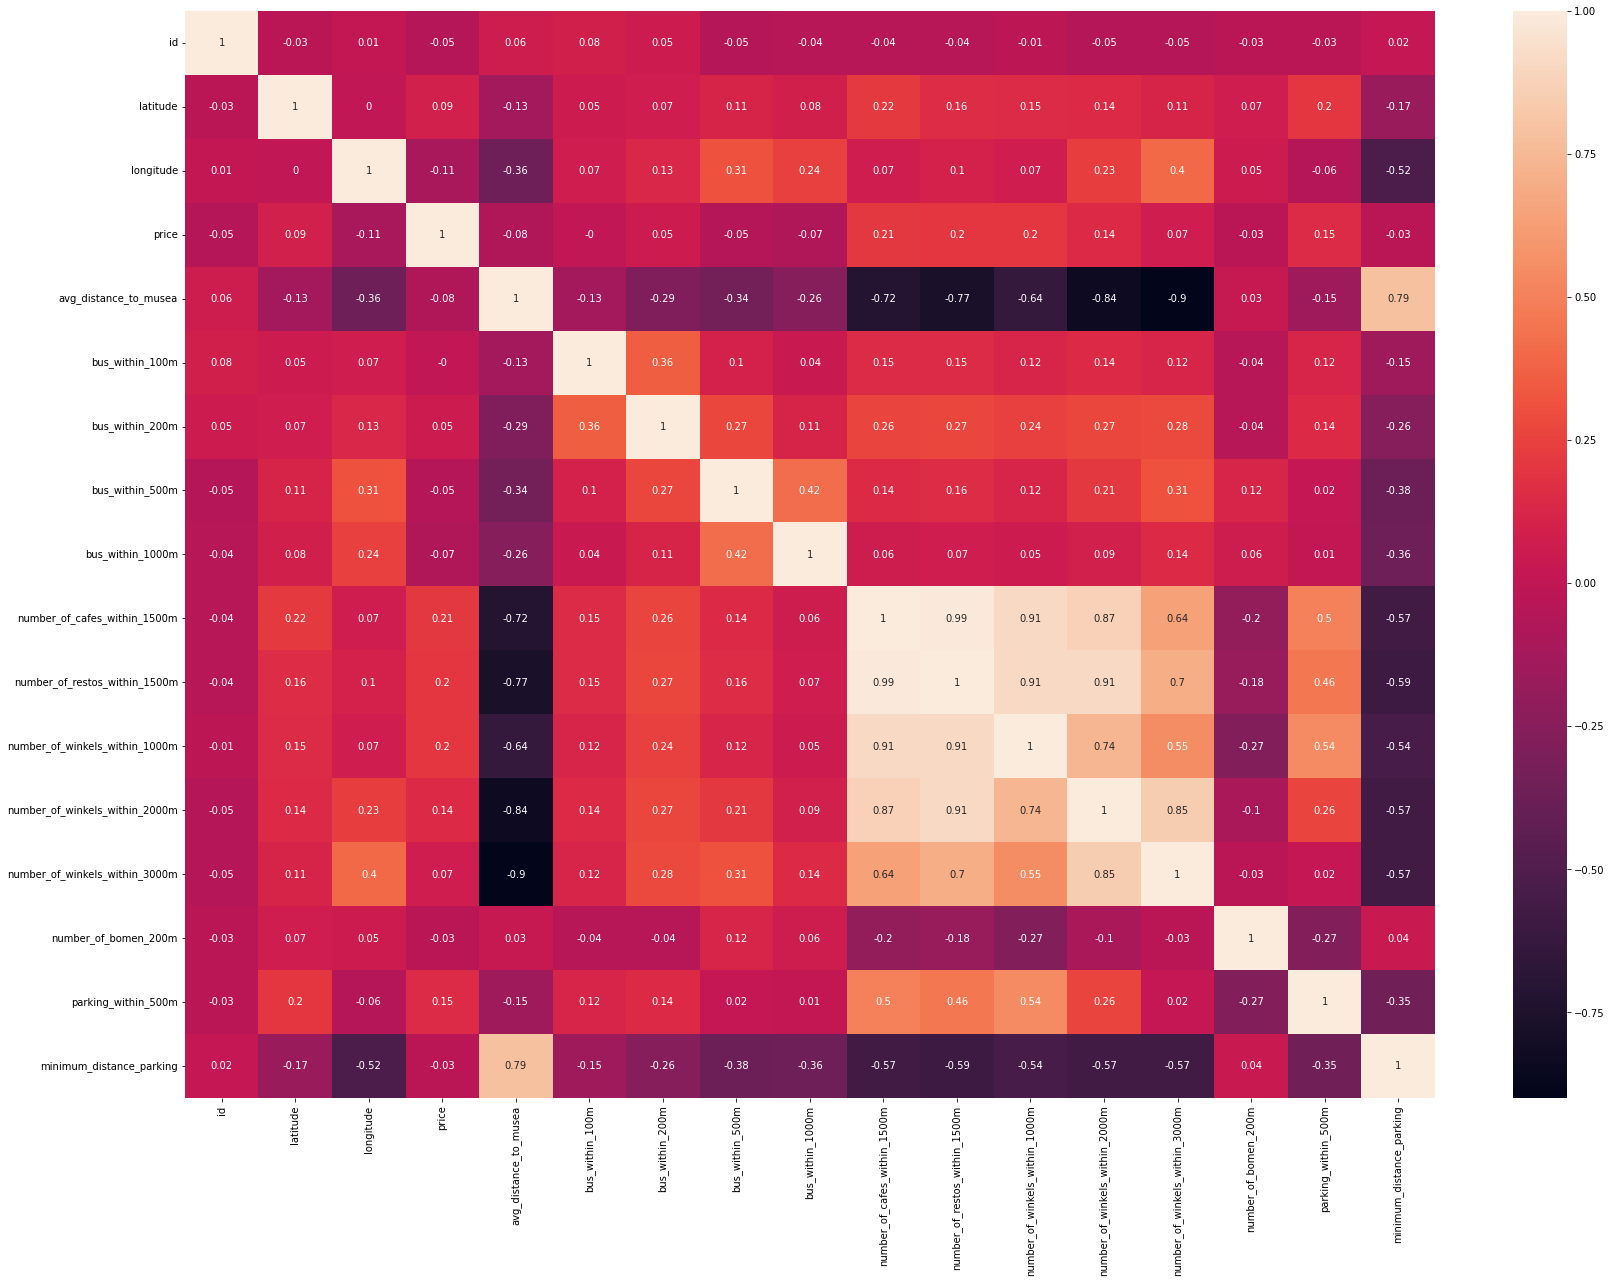

In [263]:
correlation_matrix = data_cleaned.corr().round(2)
plt.figure(figsize=(28,20))
sns.heatmap(data=correlation_matrix, annot=True)

In [ ]:
# outliers?